In [28]:
import json
import pandas as pd
from pathlib import Path
from lib.utils import read_jsonl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
import numpy as np

### Load data (root dir: extracted/)

In [29]:
results = {
    'title generation': [],
    'title selection': []

}

for (fname, task) in [('subid_to_titles_match.json', 'title generation'), ('subid_to_choice.json', 'title selection')]:
    print(task)

    for in_path in Path(f'extracted').rglob(fname):
        with open(in_path, 'r') as file:
            data = json.load(file)

        print(f"{len(data):5} | {in_path}")

        config = str(in_path).split('/')

        model = config[1]
        domain = config[2]
        modality = config[3]
        if modality != 'image':
            modality = 'descr/' + modality
        
        results[task].append(
            {
                'modality': modality,
                'domain': domain,
                'model': model,
                'task': task,
                'data': data,
                'fpath': in_path
            }
        )

title generation
  796 | extracted/gpt-4-0125-preview/music/llava-v1.5-13b/subid_to_titles_match.json
  796 | extracted/gpt-4-0125-preview/music/OFA-huge/subid_to_titles_match.json
  796 | extracted/gpt-4-0125-preview/music/gpt-4-vision-preview/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/llava-v1.5-13b/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/OFA-huge/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/gpt-4-vision-preview/subid_to_titles_match.json
  796 | extracted/llava-v1.5-CoI/music/image/subid_to_titles_match.json
 1470 | extracted/llava-v1.5-CoI/books/image/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/llava-v1.5-13b/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/OFA-huge/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/gpt-4-vision-preview/subid_to_titles_match.json
 1470 | extracted/gpt-3.5-turbo-0125/books/llava-v1.5-13b/subid_to_titles_

### Title generation

In [30]:
def get_hit_k(input_list, k):
    hit_k = 0 
    for i in input_list[:k]:
        if isinstance(i, dict):
            hit_k = 1
    return hit_k

In [31]:
for r in results['title generation']:
    
    subid_to_match = r['data']

    for k in [1, 10, 20]:
        avg_hit_k = 0    
        for subid in subid_to_match:
            
            hit_k = get_hit_k(subid_to_match[subid], k)
            avg_hit_k += hit_k 
        
        avg_hit_k /= len(subid_to_match)
        r[f'Hit@{k}'] = avg_hit_k

In [32]:
tg_results_df = pd.DataFrame(results['title generation']).drop(['data', 'fpath'], axis=1)
tg_results_df.sort_values(by=['modality', 'domain', 'model', 'task'], inplace=True)

In [33]:
tg_results_df 

,modality,domain,model,task,Hit@1,Hit@10,Hit@20
20,descr/OFA-huge,books,Llama-2-13b-chat-hf,title generation,0.052381,0.139456,0.174830
12,descr/OFA-huge,books,gpt-3.5-turbo-0125,title generation,0.140816,0.350340,0.412245
4,descr/OFA-huge,books,gpt-4-0125-preview,title generation,0.146939,0.383673,0.431293
37,descr/OFA-huge,books,gpt-4-vision-preview,title generation,0.150340,0.382313,0.442177
28,descr/OFA-huge,books,vicuna-13b-v1.5,title generation,0.001361,0.007483,0.010204
17,descr/OFA-huge,music,Llama-2-13b-chat-hf,title generation,0.042714,0.106784,0.149497
9,descr/OFA-huge,music,gpt-3.5-turbo-0125,title generation,0.046482,0.157035,0.194724
1,descr/OFA-huge,music,gpt-4-0125-preview,title generation,0.070352,0.195980,0.237437
33,descr/OFA-huge,music,gpt-4-vision-preview,title generation,0.079146,0.202261,0.236181
25,descr/OFA-huge,music,vicuna-13b-v1.5,title generation,0.010050,0.025126,0.027638


### Title selection

In [34]:
domain_to_gt = {
    'books': pd.DataFrame(read_jsonl('data/processed/books/submissions_ns.jsonl'), columns = ['submission_id', 'true_index']),
    'music': pd.DataFrame(read_jsonl('data/processed/music/submissions_ns.jsonl'), columns = ['submission_id', 'true_index'])
}
for domain in domain_to_gt:
    domain_to_gt[domain] = {row['submission_id']: row['true_index'] for _, row in domain_to_gt[domain].iterrows()}

# values are dict (subid -> choice)

In [35]:
for r in results['title selection']:
    
    subid_to_choice = r['data']
    domain = r['domain']

    acc = 0
    for subid in subid_to_choice:
        pr = subid_to_choice[subid]
        gt = domain_to_gt[domain][subid]
        
        if pr == gt:
            acc += 1

    acc /= len(subid_to_choice)

    r['Accuracy'] = acc # float(f"{acc:.4f}")

In [36]:
ts_results_df = pd.DataFrame(results['title selection']).drop(['data', 'fpath'], axis=1)
ts_results_df.sort_values(by=['modality', 'domain', 'model', 'task'], inplace=True)

In [37]:
ts_results_df

,modality,domain,model,task,Accuracy
20,descr/OFA-huge,books,Llama-2-13b-chat-hf,title selection,0.390476
12,descr/OFA-huge,books,gpt-3.5-turbo-0125,title selection,0.606122
4,descr/OFA-huge,books,gpt-4-0125-preview,title selection,0.734694
37,descr/OFA-huge,books,gpt-4-vision-preview,title selection,0.707483
28,descr/OFA-huge,books,vicuna-13b-v1.5,title selection,0.289796
17,descr/OFA-huge,music,Llama-2-13b-chat-hf,title selection,0.297739
9,descr/OFA-huge,music,gpt-3.5-turbo-0125,title selection,0.457286
1,descr/OFA-huge,music,gpt-4-0125-preview,title selection,0.528894
33,descr/OFA-huge,music,gpt-4-vision-preview,title selection,0.530151
25,descr/OFA-huge,music,vicuna-13b-v1.5,title selection,0.265075


### Results dir

In [38]:
results_dir = Path('results')
results_dir.mkdir(exist_ok=True, parents=True)

In [39]:
tg_results_df.to_csv(results_dir / 'title_generation.csv')
ts_results_df.to_csv(results_dir / 'title_selection.csv')

### Performance correlation between two tasks

In [40]:
plt.rcParams.update({'font.size': 14}) 

colormap = {
    'books': 'tab:blue',
    'music': 'tab:olive'
}

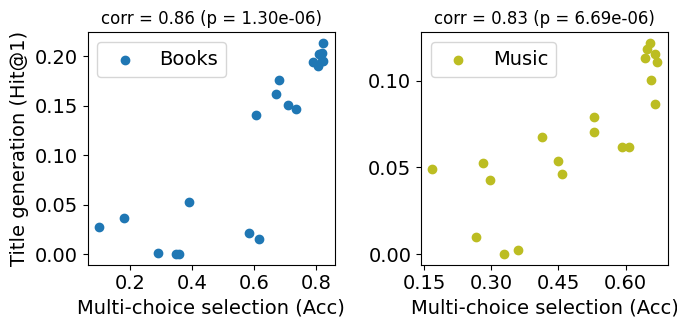

In [41]:
books_ts = ts_results_df[ts_results_df['domain'] == 'books']
books_tg = tg_results_df[tg_results_df['domain'] == 'books']
music_ts = ts_results_df[ts_results_df['domain'] == 'music']
music_tg = tg_results_df[tg_results_df['domain'] == 'music']

corr_books, p_value_books = pearsonr(books_ts['Accuracy'], books_tg[f'Hit@{k}'])
corr_music, p_value_music = pearsonr(music_ts['Accuracy'], music_tg[f'Hit@{k}'])

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

k = 1
axs[0].scatter(books_ts['Accuracy'], books_tg[f'Hit@{k}'], color=colormap['books'], label='Books')
image_modality_books = books_ts['modality'] == 'image'
# axs[0].scatter(books_ts[image_modality_books]['Accuracy'], books_tg[image_modality_books][f'Hit@{k}'], facecolors='none', edgecolors='red', linewidth=1.5, s=120)  # red circle
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0].set_xlabel('Multi-choice selection (Acc)')
axs[0].set_ylabel(f'Title generation (Hit@{k})')
axs[0].set_title(f'corr = {corr_books:.2f} (p = {p_value_books:.2e})', fontsize=12)
axs[0].legend(loc='upper left')

axs[1].scatter(music_ts['Accuracy'], music_tg[f'Hit@{k}'], color=colormap['music'], label='Music')
image_modality_music = music_ts['modality'] == 'image'
# axs[1].scatter(music_ts[image_modality_music]['Accuracy'], music_tg[image_modality_music][f'Hit@{k}'], facecolors='none', edgecolors='red', linewidth=1.5, s=120)  # red circle
axs[1].set_title(f'corr = {corr_music:.2f} (p = {p_value_music:.2e})', fontsize=12)
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1].set_xlabel('Multi-choice selection (Acc)')

axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

fig.tight_layout()
fig.savefig(results_dir / f'correlation.pdf', bbox_inches='tight')

### How do descriptions affect performance?

In [42]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

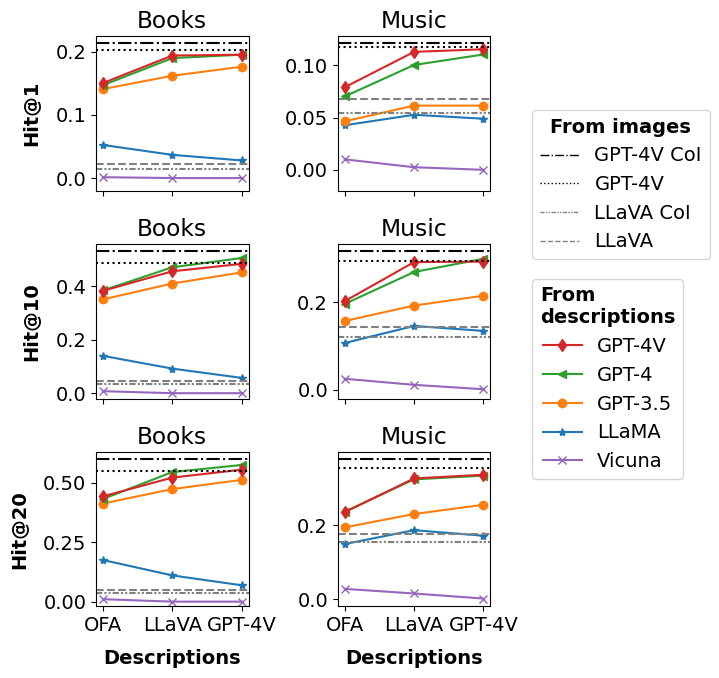

In [43]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']

markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(ax, domain, metric, handles_labels):
    ###
    # From images
    gpt4v_coi_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'gpt-4-vision-CoI') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    gpt4v_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'gpt-4-vision-preview') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    llava_coi_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'llava-v1.5-CoI') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    llava_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'llava-v1.5-13b') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    ####

    df_filtered = tg_results_df[tg_results_df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if 'llava' in model.lower():
            continue
        if 'coi' in model.lower():
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], marker=markers[i], label=model)
        handles_labels.append((line, model))
        i += 1
    
    ax.axhline(y=gpt4v_coi_ref, color='black', linestyle='-.') 
    ax.axhline(y=gpt4v_ref, color='black', linestyle=':') 
    ax.axhline(y=llava_coi_ref, color='grey', linestyle=(0, (3, 1, 1, 1, 1, 1))) 
    ax.axhline(y=llava_ref, color='grey', linestyle='--') 

    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name[m.split('/')[-1]] for m in modalities])
    
    ax.set_ylim(-0.02, gpt4v_coi_ref * 1.05)

    # ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(domain.capitalize())

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5.5, 7), sharey=False, sharex=True)

handles_labels = []
plot_domain(axes[0][0], 'books', 'Hit@1', [])
plot_domain(axes[0][1], 'music', 'Hit@1', [])
plot_domain(axes[1][0], 'books', 'Hit@10', [])
plot_domain(axes[1][1], 'music', 'Hit@10', [])
plot_domain(axes[2][0], 'books', 'Hit@20', [])
plot_domain(axes[2][1], 'music', 'Hit@20', handles_labels)

labelpad = 10
axes[0][0].set_ylabel('Hit@1', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[2][0].set_ylabel('Hit@20', labelpad=labelpad, fontweight='bold')
axes[2][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[2][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')


###
# From images
handles = [
    plt.Line2D([0], [0], color='black', linestyle='-.', linewidth=1),
    plt.Line2D([0], [0], color='black', linestyle=':', linewidth=1),
    plt.Line2D([0], [0], color='grey', linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=1), 
    plt.Line2D([0], [0], color='grey', linestyle='--', linewidth=1)]
labels = ['GPT-4V CoI', 'GPT-4V', 'LLaVA CoI', 'LLaVA']
# legend = fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.97, 0.4), ncol=1, title='From images')
legend = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.97, 0.6), ncol=1, title='From images')
legend.get_title().set_fontweight('bold')
###

custom_order = ['GPT-4V' , 'GPT-4', 'GPT-3.5', 'LLaMA', 'Vicuna']
handles_labels = [(h, model_name_to_display_name[l]) for h,l in handles_labels]
ordered_handles_labels = sorted(handles_labels, key=lambda hl: custom_order.index(hl[1]))
ordered_handles, ordered_labels = zip(*ordered_handles_labels)
# legend =  fig.legend(ordered_handles, ordered_labels, loc='lower left', bbox_to_anchor=(0.97, 0.4), ncol=1, title='From\ndescriptions')
legend =  fig.legend(ordered_handles, ordered_labels, loc='upper left', bbox_to_anchor=(0.97, 0.6), ncol=1, title='From\ndescriptions')
legend.get_title().set_fontweight('bold')

fig.tight_layout()
fig.savefig(results_dir / f'title_generation.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

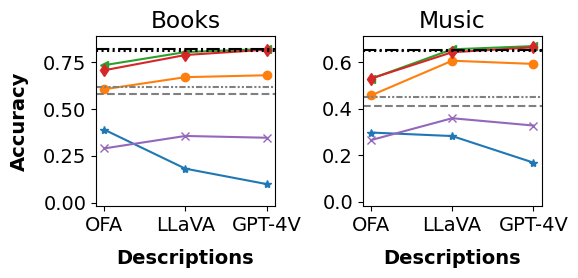

In [44]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']

markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(ax, domain, metric, handles_labels):
    ###
    # From images
    gpt4v_coi_ref = ts_results_df[
        (ts_results_df['modality'] == 'image') &
        (ts_results_df['domain'] == domain) &
        (ts_results_df['model'] == 'gpt-4-vision-CoI') &
        (ts_results_df['task'] == 'title selection')
    ].iloc[0][metric]
    gpt4v_ref = ts_results_df[
        (ts_results_df['modality'] == 'image') &
        (ts_results_df['domain'] == domain) &
        (ts_results_df['model'] == 'gpt-4-vision-preview') &
        (ts_results_df['task'] == 'title selection')
    ].iloc[0][metric]
    llava_coi_ref = ts_results_df[
        (ts_results_df['modality'] == 'image') &
        (ts_results_df['domain'] == domain) &
        (ts_results_df['model'] == 'llava-v1.5-CoI') &
        (ts_results_df['task'] == 'title selection')
    ].iloc[0][metric]
    llava_ref = ts_results_df[
        (ts_results_df['modality'] == 'image') &
        (ts_results_df['domain'] == domain) &
        (ts_results_df['model'] == 'llava-v1.5-13b') &
        (ts_results_df['task'] == 'title selection')
    ].iloc[0][metric]
    # ####

    df_filtered = ts_results_df[ts_results_df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if 'llava' in model.lower():
            continue
        if 'coi' in model.lower():
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], marker=markers[i], label=model)
        handles_labels.append((line, model))
        i += 1
    
    ax.axhline(y=gpt4v_coi_ref, color='black', linestyle='-.') 
    ax.axhline(y=gpt4v_ref, color='black', linestyle=':') 
    ax.axhline(y=llava_coi_ref, color='grey', linestyle=(0, (3, 1, 1, 1, 1, 1))) 
    ax.axhline(y=llava_ref, color='grey', linestyle='--') 

    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name[m.split('/')[-1]] for m in modalities])
    
    ax.set_ylim(-0.02, gpt4v_ref * 1.1)

    ax.set_title(domain.capitalize())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), sharey=False, sharex=True)

handles_labels = []
plot_domain(axes[0], 'books', 'Accuracy', [])
plot_domain(axes[1], 'music', 'Accuracy', handles_labels)

labelpad = 10
axes[0].set_ylabel('Accuracy', labelpad=labelpad, fontweight='bold')
axes[0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')


fig.tight_layout()
fig.savefig(results_dir / f'title_selection.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

### Purely for Legend

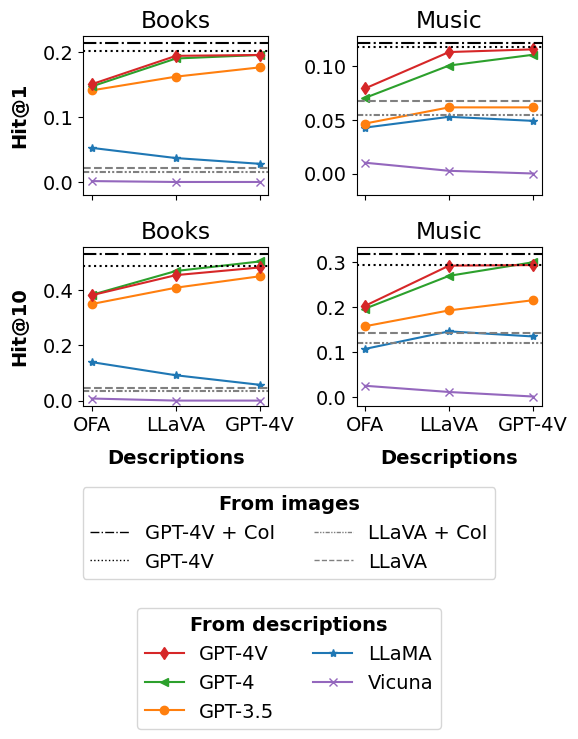

In [18]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']

markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(ax, domain, metric, handles_labels):
    ###
    # From images
    gpt4v_coi_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'gpt-4-vision-CoI') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    gpt4v_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'gpt-4-vision-preview') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    llava_coi_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'llava-v1.5-CoI') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    llava_ref = tg_results_df[
        (tg_results_df['modality'] == 'image') &
        (tg_results_df['domain'] == domain) &
        (tg_results_df['model'] == 'llava-v1.5-13b') &
        (tg_results_df['task'] == 'title generation')
    ].iloc[0][metric]
    ####

    df_filtered = tg_results_df[tg_results_df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if 'llava' in model.lower():
            continue
        if 'coi' in model.lower():
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], marker=markers[i], label=model)
        handles_labels.append((line, model))
        i += 1
    
    ax.axhline(y=gpt4v_coi_ref, color='black', linestyle='-.') 
    ax.axhline(y=gpt4v_ref, color='black', linestyle=':') 
    ax.axhline(y=llava_coi_ref, color='grey', linestyle=(0, (3, 1, 1, 1, 1, 1))) 
    ax.axhline(y=llava_ref, color='grey', linestyle='--') 

    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name[m.split('/')[-1]] for m in modalities])
    
    ax.set_ylim(-0.02, gpt4v_coi_ref * 1.05)

    # ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(domain.capitalize())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5), sharey=False, sharex=True)

handles_labels = []
plot_domain(axes[0][0], 'books', 'Hit@1', [])
plot_domain(axes[0][1], 'music', 'Hit@1', [])
plot_domain(axes[1][0], 'books', 'Hit@10', [])
plot_domain(axes[1][1], 'music', 'Hit@10', handles_labels)

labelpad = 10
axes[0][0].set_ylabel('Hit@1', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[1][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')


###
# From images
handles = [
    plt.Line2D([0], [0], color='black', linestyle='-.', linewidth=1),
    plt.Line2D([0], [0], color='black', linestyle=':', linewidth=1),
    plt.Line2D([0], [0], color='grey', linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=1), 
    plt.Line2D([0], [0], color='grey', linestyle='--', linewidth=1)]
labels = ['GPT-4V + CoI', 'GPT-4V', 'LLaVA + CoI', 'LLaVA']
legend =  fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, title='From images')
legend.get_title().set_fontweight('bold')
###

custom_order = ['GPT-4V' , 'GPT-4', 'GPT-3.5', 'LLaMA', 'Vicuna']
handles_labels = [(h, model_name_to_display_name[l]) for h,l in handles_labels]
ordered_handles_labels = sorted(handles_labels, key=lambda hl: custom_order.index(hl[1]))
ordered_handles, ordered_labels = zip(*ordered_handles_labels)
legend =  fig.legend(ordered_handles, ordered_labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2, title='From descriptions')
# legend =  fig.legend(ordered_handles, ordered_labels, loc='upper left', bbox_to_anchor=(0.97, 0.6), ncol=1, title='From\ndescriptions')
legend.get_title().set_fontweight('bold')

fig.tight_layout()
fig.savefig(results_dir / f'legend.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()